Last modified: 1/27/2018

# Summary
All related code/figures for oSBM. Code organization assumes working directory is notebook folder location.

In [8]:
import sys
print(sys.version)

from __future__ import division
import os
#import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import Grid

# relevant python libraries
execfile('../functions/python_libraries.py')

# oSBM code
execfile('../functions/create_oSBM_class_specific_alternative.py')

# compute homophily + monophily
execfile('../functions/compute_homophily.py')
execfile('../functions/compute_monophily.py')
execfile('../functions/SI_functions/LINK_finalized_coeff.py')

# code for attribute prediction
execfile('../functions/benchmark_classifier.py')
execfile('../functions/LINK.py')
execfile('../functions/majority_vote.py')
execfile('../functions/ZGL.py')

2.7.12 |Anaconda 2.3.0 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


### create 4 graph instances: noB-noO, yesB-noO, noB-yesO, yesB-yesO

In [9]:
disp_val = 0.004

In [10]:
(adj_noBnoO_osbm, y_noBnoO_osbm) =  create_affiliation_model_temp(84,
                                          lambda_block_parameter = 1,
                                          dispersion_parameter_vect = np.array([np.array([0, 0]),
                                            np.array([0, 0])]), 
                                          class_size_vect = np.array([1000,1000]))

('p_in: ', 0.042000000000000003)
('p_out: ', 0.042000000000000003)

spot-check average degree: 
84.0155

spot-check homophily: 
[0.50327332242225864, 0.49968344223716749]

spot-check monophily: 
[0.0, 0.0]



In [11]:
( adj_yesBnoO_osbm, y_yesBnoO_osbm) = create_affiliation_model_temp(84,
                                          lambda_block_parameter =1.2,
                                          dispersion_parameter_vect = np.array([np.array([0, 0]),
                                            np.array([0, 0])]),
                                          class_size_vect = np.array([1000,1000]))

('p_in: ', 0.0504)
('p_out: ', 0.033599999999999998)

spot-check average degree: 
84.0205

spot-check homophily: 
[0.59743981658387457, 0.60008066716490505]

spot-check monophily: 
[0.0, 0.0]



In [12]:
(adj_noByesO_osbm, y_noByesO_osbm) = create_affiliation_model_temp(84,
                                         lambda_block_parameter =1,
                                         dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                            np.array([disp_val, disp_val])]),
                                         class_size_vect = np.array([1000,1000]))

('p_in: ', 0.042000000000000003)
('p_out: ', 0.042000000000000003)

spot-check average degree: 
84.5855

spot-check homophily: 
[0.49906807809027698, 0.50947082704479774]

spot-check monophily: 
[0.04049040128376043, 0.03806536129165953]



In [13]:
(adj_yesByesO_osbm, y_yesByesO_osbm) = create_affiliation_model_temp(84,
                                           lambda_block_parameter =1.2,
                                           dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                              np.array([disp_val, disp_val])]),
                                           class_size_vect = np.array([1000,1000]))

('p_in: ', 0.0504)
('p_out: ', 0.033599999999999998)

spot-check average degree: 
83.997

spot-check homophily: 
[0.59857524700491616, 0.60041572633329376]

spot-check monophily: 
[0.041912849219133755, 0.04183119893410869]



In [14]:
# create proportion F

# noB-noO
degree_noBnoO = np.sum(adj_noBnoO_osbm,1)
degree_F_noBnoO = adj_noBnoO_osbm * np.matrix((y_noBnoO_osbm==1)+0).T

prop_F_noBnoO = degree_F_noBnoO/degree_noBnoO

# noB-yesO
degree_noByesO = np.sum(adj_noByesO_osbm,1)
degree_F_noByesO = adj_noByesO_osbm * np.matrix((y_noByesO_osbm==1)+0).T

prop_F_noByesO = degree_F_noByesO/degree_noByesO

# yesB-noO
degree_yesBnoO = np.sum(adj_yesBnoO_osbm,1)
degree_F_yesBnoO = adj_yesBnoO_osbm * np.matrix((y_yesBnoO_osbm==1)+0).T

prop_F_yesBnoO = degree_F_yesBnoO/degree_yesBnoO


# yesB-yesO
degree_yesByesO = np.sum(adj_yesByesO_osbm,1)
degree_F_yesByesO = adj_yesByesO_osbm * np.matrix((y_yesByesO_osbm==1)+0).T

prop_F_yesByesO = degree_F_yesByesO/degree_yesByesO

### null distribution on oSBM and class preference distribution

In [15]:
n_iter = 100000

## noBnoO
d_iF_noBnoO = map(np.int,np.array(degree_noBnoO[y_noBnoO_osbm==1].T)[0])
mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(d_iF_noBnoO)), 
                                    p=np.mean(prop_F_noBnoO[y_noBnoO_osbm==1]))/d_iF_noBnoO)
mc_F_final_noBnoO = np.array(mc_F).flatten()

d_iM_noBnoO = map(np.int,np.array(degree_noBnoO[y_noBnoO_osbm==0].T)[0])
mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(d_iM_noBnoO)), 
                                    p=np.mean(1-prop_F_noBnoO[y_noBnoO_osbm==0]))/d_iM_noBnoO)
mc_M_final_noBnoO = np.array(mc_M).flatten()

In [16]:
## yesBnoO
d_iF_yesBnoO = map(np.int,np.array(degree_yesBnoO[y_yesBnoO_osbm==1].T)[0])
mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(d_iF_yesBnoO)),
                                    p=np.mean(prop_F_yesBnoO[y_yesBnoO_osbm==1]))/d_iF_yesBnoO)
mc_F_final_yesBnoO = np.array(mc_F).flatten()

d_iM_yesBnoO = map(np.int,np.array(degree_yesBnoO[y_yesBnoO_osbm==0].T)[0])
mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(d_iM_yesBnoO)), 
                                    p=np.mean(1-prop_F_yesBnoO[y_yesBnoO_osbm==0]))/d_iM_yesBnoO)
mc_M_final_yesBnoO = np.array(mc_M).flatten()

In [17]:
## noByesO
d_iF_noByesO = map(np.int,np.array(degree_noByesO[y_noByesO_osbm==1].T)[0])
mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(d_iF_noByesO)),
                                    p=np.mean(prop_F_noByesO[y_noByesO_osbm==1]))/d_iF_noByesO)
mc_F_final_noByesO = np.array(mc_F).flatten()

d_iM_noByesO = map(np.int,np.array(degree_noByesO[y_noByesO_osbm==0].T)[0])
mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(d_iM_noByesO)),
                                    p=np.mean(1-prop_F_noByesO[y_noByesO_osbm==0]))/d_iM_noByesO)
mc_M_final_noByesO = np.array(mc_M).flatten()

In [18]:
## yesByesO
d_iF_yesByesO = map(np.int,np.array(degree_yesByesO[y_yesByesO_osbm==1].T)[0])
mc_F = []
for j in range(n_iter):
    mc_F.append( np.random.binomial(n=map(np.int,np.array(d_iF_yesByesO)), 
                                    p=np.mean(prop_F_yesByesO[y_yesByesO_osbm==1]))/d_iF_yesByesO)
mc_F_final_yesByesO = np.array(mc_F).flatten()

d_iM_yesByesO = map(np.int,np.array(degree_yesByesO[y_yesByesO_osbm==0].T)[0])
mc_M = []
for j in range(n_iter):
    mc_M.append( np.random.binomial(n=map(np.int,np.array(d_iM_yesByesO)), 
                                    p=np.mean(1-prop_F_yesByesO[y_yesByesO_osbm==0]))/d_iM_yesByesO)
mc_M_final_yesByesO = np.array(mc_M).flatten()

## oSBM Main Paper Figure -- overdispersion versus bias

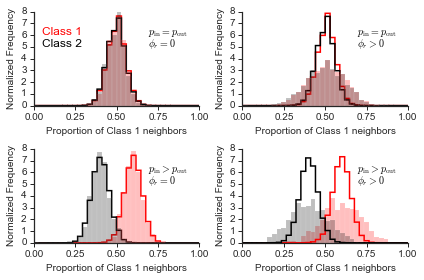

In [20]:
%matplotlib inline

alpha_parameter = 0.25
fig = plt.figure()
binBoundaries = np.linspace(0,1,num=35)
grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.6, label_mode='all'
            )
y_min = 0
y_max = 8
xlabel_block = 0.69 #*100
label_loc1 = 6
label_loc2 = 5
for i in range(4):
    if i == 0: 
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        grid[i].annotate('Class 2', xy=(0.05, label_loc2), 
             color='black',
                         size=12)
        grid[i].annotate('Class 1', xy=(0.05, label_loc1), 
             color='red', 
                         size=12)
        grid[i].annotate('$p_{\\mathrm{in}} = p_{\\mathrm{out}}$', xy=(xlabel_block, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r = 0$', xy=(xlabel_block, label_loc2), 
             color='black', alpha=1, size=10)
        
        grid[i].hist(mc_F_final_noBnoO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'red',histtype='step',
         color='white',alpha=1,lw=1.5)
        
        grid[i].hist(1 - mc_M_final_noBnoO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'black',histtype='step',
         color='white',alpha=1,lw=1.5)
        
        
        grid[i].xaxis.set_major_locator(FixedLocator([0,0.25,0.50,0.75,1]))
        grid[i].yaxis.set_major_locator(FixedLocator([0,1,2,3,4,5,6,7,8]))

        grid[i].hist(prop_F_noBnoO[y_noBnoO_osbm==1], 
                    bins=binBoundaries, 
                    normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white',color='red')
        
        grid[i].hist(prop_F_noBnoO[y_noBnoO_osbm==0], 
                    bins=binBoundaries,
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white', color='black')
        
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylabel('Normalized Frequency', size = 10)
        grid[i].set_ylim(y_min,y_max)
        grid[i].set_xlabel('Proportion of Class 1 neighbors', size = 10)


    if i == 1:
        grid[i].xaxis.set_major_locator(FixedLocator([0,.25,.50,.75,1.00]))
        grid[i].yaxis.set_major_locator(FixedLocator([0,1,2,3,4,5,6,7,8]))

        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


        grid[i].annotate('$p_{\\mathrm{in}} = p_{\\mathrm{out}}$', xy=(xlabel_block, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r > 0$ ', xy=(xlabel_block, label_loc2), 
             color='black', alpha=1, size=10)

        grid[i].hist(mc_F_final_noByesO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'red',histtype='step',
         color='white',alpha=1,lw=1.5)
        
        grid[i].hist(1-mc_M_final_noByesO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'black',histtype='step',
         color='white',alpha=1,lw=1.5)

        grid[i].hist(prop_F_noByesO[y_noByesO_osbm==1], 
                     bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                     edgecolor = 'white',color='red')
        
        grid[i].hist(prop_F_noByesO[y_noByesO_osbm==0], 
                     bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                     edgecolor = 'white', color='black')
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylim(y_min,y_max)
        grid[i].set_ylabel('Normalized Frequency', size = 10)
        grid[i].set_xlabel('Proportion of Class 1 neighbors', size = 10)

    if i == 2:
        grid[i].xaxis.set_major_locator(FixedLocator([0,.25,.50,.75,1.00]))
        grid[i].yaxis.set_major_locator(FixedLocator([0,1,2,3,4,5,6,7,8]))

        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

        grid[i].annotate('$p_{\\mathrm{in}} > p_{\\mathrm{out}}$', xy=(xlabel_block, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r = 0$', xy=(xlabel_block, label_loc2), 
             color='black', alpha=1, size=10)
        
        grid[i].hist(mc_F_final_yesBnoO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'red',histtype='step',
         color='white',alpha=1,lw=1.5)
        
        grid[i].hist(1-mc_M_final_yesBnoO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'black',histtype='step',
        color='white',alpha=1,lw=1.5)
        
        grid[i].hist(prop_F_yesBnoO[y_yesBnoO_osbm==1], 
                     bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                     edgecolor = 'white', color='red')
        
        grid[i].hist(prop_F_yesBnoO[y_yesBnoO_osbm==0], 
                     bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                     edgecolor = 'white', color='black')

        grid[i].set_ylim(y_min,y_max)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylabel('Normalized Frequency', size = 10)
        grid[i].set_xlabel('Proportion of Class 1 neighbors', size = 10)

    if i == 3:
        grid[i].xaxis.set_major_locator(FixedLocator([0,.25,.50,.75,1.00]))
        grid[i].yaxis.set_major_locator(FixedLocator([0,1,2,3,4,5,6,7,8]))

        grid[i].hist(prop_F_yesByesO[y_yesByesO_osbm==1], 
                     bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                     edgecolor = 'white', color='red')
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        
        grid[i].hist(prop_F_yesByesO[y_yesByesO_osbm==0], 
                     bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                     edgecolor = 'white', color='black')
        grid[i].annotate('$p_{\\mathrm{in}} > p_{\\mathrm{out}}$', xy=(xlabel_block, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r > 0$', xy=(xlabel_block, label_loc2), 
             color='black', alpha=1, size=10)

        grid[i].hist(mc_F_final_yesByesO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'red', histtype='step',
         color='white', alpha=1, lw=1.5)
        
        grid[i].hist(1 - mc_M_final_yesByesO,
         bins = binBoundaries,
         normed = True,
         edgecolor = 'black', histtype='step',
         color='white', alpha=1, lw=1.5)
        
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylim(y_min,y_max)
        grid[i].set_ylabel('Normalized Frequency', size = 10)
        grid[i].set_xlabel('Proportion of Class 1 neighbors', size = 10)

plt.tight_layout()
pp = PdfPages('../../figures/oSBM_overdispersion_consolidated.pdf')
pp.savefig()
pp.close()

## Compare $\beta_j$ coefficient from LINK versus node $j$'s true label

In [21]:
percent_initially_unlabelled = [0.1]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [22]:
n_iter = 1

In [23]:
coef = LINK_coeff(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_yesBnoO_osbm), ## gender labels 
                                                              np.matrix(adj_yesBnoO_osbm), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    C=10e20,
                                                                                                    solver='lbfgs'),
                                                              num_iter=n_iter) 

0.1


In [24]:
from __future__ import division
prop_class_1 =(adj_yesBnoO_osbm * np.matrix(y_yesBnoO_osbm==1).T)/(np.sum(adj_yesBnoO_osbm,1))

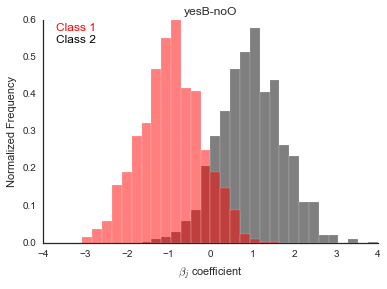

In [25]:
%matplotlib inline
ax = plt.subplot(111)
alpha_parameter = 0.5
binBoundaries=np.linspace(-4,4,num=35)

ax.hist(coef[y_noByesO_osbm==1], color='black', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')

ax.hist(coef[y_yesBnoO_osbm==0], color='red', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')
plt.xlabel(r'$\beta_j$ coefficient')
plt.ylabel('Normalized Frequency')
plt.title('yesB-noO')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate('Class 1', xy=(-3.7, 0.57), 
                 color='red', alpha=1, size=12)

ax.annotate('Class 2', xy=(-3.7, 0.54), 
                 color='black', alpha=1, size=12)


pp = PdfPages('../../figures/yesB_noO_Butterfly_actual_class_histogram.pdf')
pp.savefig()
pp.close()

In [26]:
coef= LINK_coeff(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_noByesO_osbm), ## gender labels 
                                                              np.matrix(adj_noByesO_osbm), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 




0.1


In [27]:
prop_class_1 =(adj_noByesO_osbm * np.matrix(y_noByesO_osbm==1).T)/(np.sum(adj_noByesO_osbm,1))

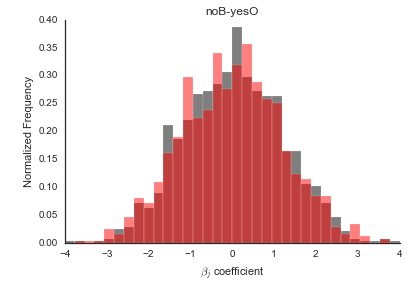

In [28]:
%matplotlib inline
ax = plt.subplot(111)
alpha_parameter = 0.5
binBoundaries=np.linspace(-4,4,num=35)

ax.hist(coef[y_noByesO_osbm==1], color='black', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')

ax.hist(coef[y_yesBnoO_osbm==0], color='red', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')
plt.xlabel(r'$\beta_j$ coefficient')
plt.ylabel('Normalized Frequency')
plt.title('noB-yesO')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate('Class 1', xy=(-3.7, 0.57), 
                 color='red', alpha=1, size=12)

ax.annotate('Class 2', xy=(-3.7, 0.54), 
                 color='black', alpha=1, size=12)


pp = PdfPages('../../figures/noB_yesO_Butterfly_actual_class_histogram.pdf')
pp.savefig()
pp.close()

In [29]:
coef = LINK_coeff(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_yesByesO_osbm), ## gender labels 
                                                              np.matrix(adj_yesByesO_osbm), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 




0.1


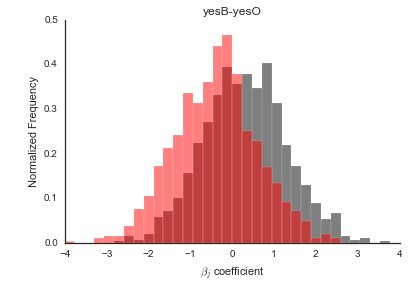

In [30]:
%matplotlib inline
ax = plt.subplot(111)
alpha_parameter = 0.5
binBoundaries=np.linspace(-4,4,num=35)

ax.hist(coef[y_yesByesO_osbm==1], color='black', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')

ax.hist(coef[y_yesByesO_osbm==0], color='red', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')
plt.xlabel(r'$\beta_j$ coefficient')
plt.ylabel('Normalized Frequency')
plt.title('yesB-yesO')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate('Class 1', xy=(-3.7, 0.57), 
                 color='red', alpha=1, size=12)

ax.annotate('Class 2', xy=(-3.7, 0.54), 
                 color='black', alpha=1, size=12)


pp = PdfPages('../../figures/yesB_yesO_Butterfly_actual_class_histogram.pdf')
pp.savefig()
pp.close()

## Predictions on oSBM

In [31]:
percent_initially_unlabelled = [0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

### LINK
Logistic regression with minimal L2 regularization applied to LINK features.

In [32]:
n_iter = 100

In [33]:
#noBnoO
(mean_accuracy_noBnoO, se_accuracy_noBnoO, mean_micro_auc_noBnoO,se_micro_auc_noBnoO, mean_wt_auc_noBnoO,se_wt_auc_noBnoO)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_noBnoO_osbm), ## gender labels 
                                                              adj_noBnoO_osbm, ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 
#yesBnoO
(mean_accuracy_yesBnoO, se_accuracy_yesBnoO, mean_micro_auc_yesBnoO,se_micro_auc_yesBnoO, mean_wt_auc_yesBnoO,se_wt_auc_yesBnoO)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_yesBnoO_osbm), ## gender labels 
                                                              adj_yesBnoO_osbm, ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 
#noByesO
(mean_accuracy_noByesO, se_accuracy_noByesO, mean_micro_auc_noByesO,se_micro_auc_noByesO, mean_wt_auc_noByesO,se_wt_auc_noByesO)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_noByesO_osbm), ## gender labels 
                                                              adj_noByesO_osbm, ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 
#yesByesO
(mean_accuracy_yesByesO, se_accuracy_yesByesO, mean_micro_auc_yesByesO,se_micro_auc_yesByesO, mean_wt_auc_yesByesO,se_wt_auc_yesByesO)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_yesByesO_osbm), ## gender labels 
                                                              adj_yesByesO_osbm, ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


### Majority Vote - 1-hop, 2-hop

### 1-hop

In [34]:
#noBnoO
(mean_accuracy_mv_noBnoO, se_accuracy_mv_noBnoO, 
 mean_micro_auc_mv_noBnoO, se_micro_auc_mv_noBnoO, 
 mean_wt_auc_mv_noBnoO, se_wt_auc_mv_noBnoO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_noBnoO_osbm), 
                                                                np.array(adj_noBnoO_osbm), 
                                                                num_iter=n_iter) 
#yesBnoO
(mean_accuracy_mv_yesBnoO, se_accuracy_mv_yesBnoO, 
 mean_micro_auc_mv_yesBnoO, se_micro_auc_mv_yesBnoO, 
 mean_wt_auc_mv_yesBnoO, se_wt_auc_mv_yesBnoO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_yesBnoO_osbm), 
                                                                np.array(adj_yesBnoO_osbm), 
                                                                num_iter=n_iter) 
#noByesO
(mean_accuracy_mv_noByesO, se_accuracy_mv_noByesO, 
 mean_micro_auc_mv_noByesO, se_micro_auc_mv_noByesO, 
 mean_wt_auc_mv_noByesO, se_wt_auc_mv_noByesO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_noByesO_osbm), 
                                                                np.array(adj_noByesO_osbm), 
                                                                num_iter=n_iter) 
#yesByesO
(mean_accuracy_mv_yesByesO, se_accuracy_mv_yesByesO, 
 mean_micro_auc_mv_yesByesO, se_micro_auc_mv_yesByesO, 
 mean_wt_auc_mv_yesByesO, se_wt_auc_mv_yesByesO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_yesByesO_osbm), 
                                                                np.array(adj_yesByesO_osbm), 
                                                                num_iter=n_iter)

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide


### 2-hop

In [35]:
adj_noBnoO_osbm2 = np.matrix(adj_noBnoO_osbm)**2
adj_noBnoO_osbm2[range(adj_noBnoO_osbm2.shape[0]),range(adj_noBnoO_osbm2.shape[0])]=0

adj_yesBnoO_osbm2 = np.matrix(adj_yesBnoO_osbm)**2
adj_yesBnoO_osbm[range(adj_yesBnoO_osbm.shape[0]),range(adj_yesBnoO_osbm.shape[0])]=0

adj_noByesO_osbm2 = np.matrix(adj_noByesO_osbm)**2
adj_noByesO_osbm2[range(adj_noByesO_osbm.shape[0]),range(adj_noByesO_osbm.shape[0])]=0

adj_yesByesO_osbm2 = np.matrix(adj_yesByesO_osbm)**2
adj_yesByesO_osbm2[range(adj_noByesO_osbm.shape[0]),range(adj_yesByesO_osbm.shape[0])]=0

In [36]:
#noBnoO
(mean_accuracy_mv2_noBnoO, se_accuracy_mv2_noBnoO, 
 mean_micro_auc_mv2_noBnoO, se_micro_auc_mv2_noBnoO, 
 mean_wt_auc_mv2_noBnoO, se_wt_auc_mv2_noBnoO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_noBnoO_osbm), 
                                                                np.array(adj_noBnoO_osbm2), 
                                                                num_iter=n_iter) 
#yesBnoO
(mean_accuracy_mv2_yesBnoO, se_accuracy_mv2_yesBnoO, 
 mean_micro_auc_mv2_yesBnoO, se_micro_auc_mv2_yesBnoO, 
 mean_wt_auc_mv2_yesBnoO, se_wt_auc_mv2_yesBnoO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_yesBnoO_osbm), 
                                                                np.array(adj_yesBnoO_osbm2), 
                                                                num_iter=n_iter) 
#noByesO
(mean_accuracy_mv2_noByesO, se_accuracy_m2v_noByesO, 
 mean_micro_auc_mv2_noByesO, se_micro_auc_mv2_noByesO, 
 mean_wt_auc_mv2_noByesO, se_wt_auc_mv2_noByesO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_noByesO_osbm), 
                                                                np.array(adj_noByesO_osbm2), 
                                                                num_iter=n_iter) 
#yesByesO
(mean_accuracy_mv2_yesByesO, se_accuracy_mv2_yesByesO, 
 mean_micro_auc_mv2_yesByesO, se_micro_auc_mv2_yesByesO, 
 mean_wt_auc_mv2_yesByesO, se_wt_auc_mv2_yesByesO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                np.array(y_yesByesO_osbm), 
                                                                np.array(adj_yesByesO_osbm2),
                                                                num_iter=n_iter) 

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


### ZGL

In [37]:
(mean_accuracy_zgl_noBnoO, se_accuracy_zgl_noBnoO, 
mean_micro_auc_zgl_noBnoO, se_micro_auc_zgl_noBnoO, 
mean_wt_auc_zgl_noBnoO, se_wt_auc_zgl_noBnoO) = ZGL_finalized(np.array(adj_noBnoO_osbm),
                                    np.array(y_noBnoO_osbm), percent_initially_unlabelled, 
                                    num_iter=n_iter)

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


/Users/kristen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
(mean_accuracy_zgl_noByesO, se_accuracy_zgl_noByesO, 
mean_micro_auc_zgl_noByesO, se_micro_auc_zgl_noByesO, 
mean_wt_auc_zgl_noByesO, se_wt_auc_zgl_noByesO) = ZGL_finalized(np.array(adj_noByesO_osbm),
                                    np.array(y_noByesO_osbm), percent_initially_unlabelled, 
                                    num_iter=n_iter)

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


In [39]:
(mean_accuracy_zgl_yesBnoO, se_accuracy_zgl_yesBnoO, 
mean_micro_auc_zgl_yesBnoO, se_micro_auc_zgl_yesBnoO, 
mean_wt_auc_zgl_yesBnoO, se_wt_auc_zgl_yesBnoO) = ZGL_finalized(np.array(adj_yesBnoO_osbm),
                                    np.array(y_yesBnoO_osbm), percent_initially_unlabelled, 
                                    num_iter=n_iter)

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


In [40]:
(mean_accuracy_zgl_yesByesO, se_accuracy_zgl_yesByesO, 
mean_micro_auc_zgl_yesBnoO, se_micro_auc_zgl_yesByesO, 
mean_wt_auc_zgl_yesByesO, se_wt_auc_zgl_yesByesO) = ZGL_finalized(np.array(adj_yesByesO_osbm),
                                    np.array(y_yesByesO_osbm), percent_initially_unlabelled, 
                                    num_iter=n_iter)

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## Baseline

In [41]:
(mean_wt_auc_baseline_noBnoO, se_wt_auc_baseline_noBnoO) = random_classifier(np.array(adj_noBnoO_osbm),
                                                                             np.array(y_noBnoO_osbm),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=n_iter)

(mean_wt_auc_baseline_yesBnoO, se_wt_auc_baseline_yesBnoO) = random_classifier(np.array(adj_yesBnoO_osbm),
                                                                             np.array(y_yesBnoO_osbm),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=n_iter)

(mean_wt_auc_baseline_noByesO, se_wt_auc_baseline_noByesO) = random_classifier(np.array(adj_noByesO_osbm),
                                                                             np.array(y_noByesO_osbm),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=n_iter)

(mean_wt_auc_baseline_yesByesO, se_wt_auc_baseline_yesByesO) = random_classifier(np.array(adj_yesByesO_osbm),
                                                                             np.array(y_yesByesO_osbm),
                                                                            percent_initially_unlabelled,
                                                                             num_iter=n_iter)

0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01
0.99
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.01


## Main Paper Figure Comparing Relative Predictive Performance on oSBM 

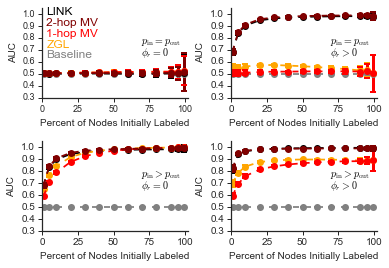

In [42]:
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.6, label_mode='all')

y_max = 1.05
y_min = 0.3
x_max = 102
label_loc1 = 0.75
label_loc2 = 0.65

for i in range(4):
    if i == 0:
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_noBnoO, 
            yerr=se_wt_auc_baseline_noBnoO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='gray')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_noBnoO, 
            yerr=se_wt_auc_noBnoO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_noBnoO,
            yerr=se_wt_auc_zgl_noBnoO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_noBnoO,
            yerr=se_wt_auc_mv_noBnoO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_noBnoO, 
            yerr=se_wt_auc_mv2_noBnoO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon')
        grid[i].set_xlim(0,x_max)
        grid[i].annotate('LINK', xy=(3, 0.99), 
                 color='black', alpha=1, size=12)
        grid[i].annotate('2-hop MV', xy=(3, 0.9), 
                 color='maroon', alpha=1, size=12)
        grid[i].annotate('1-hop MV', xy=(3, 0.9-0.09), 
                 color='red', alpha=1, size=12)
        grid[i].annotate('ZGL', xy=(3, 0.9-2*0.09), 
                 color='orange', alpha=1, size=12)
        grid[i].annotate('Baseline', xy=(3, 0.9-3*0.09), 
                 color='gray', alpha=1, size=12)
        grid[i].set_ylim(y_min,y_max)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=9)
        grid[i].tick_params(axis='both', which='minor', labelsize=9)
        grid[i].annotate('$p_{\\mathrm{in}} = p_{\\mathrm{out}}$', xy=(xlabel_block*100, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r = 0$', xy=(xlabel_block*100, label_loc2), 
             color='black', alpha=1, size=10)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled', size = 10)
        grid[i].set_ylabel('AUC', size = 10)

    if i == 1:
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_noByesO, 
            yerr=se_wt_auc_baseline_noByesO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='gray')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_noByesO, 
            yerr=se_wt_auc_noByesO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_noByesO,
            yerr=se_wt_auc_zgl_noByesO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_noByesO,
            yerr=se_wt_auc_mv_noByesO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_noByesO, 
            yerr=se_wt_auc_mv2_noByesO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon')
        grid[i].annotate('$p_{\\mathrm{in}} = p_{\\mathrm{out}}$', xy=(xlabel_block*100, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r > 0$', xy=(xlabel_block*100, label_loc2), 
             color='black', alpha=1, size=10)
        grid[i].set_ylim(y_min,y_max)
        grid[i].set_xlim(0,x_max)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylabel('AUC', size = 10)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled', size = 10)

    if i == 2:
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_yesBnoO, 
            yerr=se_wt_auc_baseline_yesBnoO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='gray')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_yesBnoO, 
            yerr=se_wt_auc_yesBnoO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_yesBnoO,
            yerr=se_wt_auc_zgl_yesBnoO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_yesBnoO,
            yerr=se_wt_auc_mv_yesBnoO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_yesBnoO, 
            yerr=se_wt_auc_mv2_yesBnoO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon')
        grid[i].annotate('$p_{\\mathrm{in}} > p_{\\mathrm{out}}$', xy=(xlabel_block*100, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r = 0$', xy=(xlabel_block*100, label_loc2), 
             color='black', alpha=1, size=10)
        grid[i].set_ylim(y_min,y_max)
        grid[i].set_xlim(0,x_max)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylabel('AUC', size = 10)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled', size = 10)

    if i == 3:
        grid[i].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_baseline_yesByesO, 
            yerr=se_wt_auc_baseline_yesByesO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='gray')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_yesByesO, 
            yerr=se_wt_auc_yesByesO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='black')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_yesByesO,
            yerr=se_wt_auc_zgl_yesByesO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='orange')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv_yesByesO,
            yerr=se_wt_auc_mv_yesByesO, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_mv2_yesByesO, 
            yerr=se_wt_auc_mv2_yesByesO, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon')
        grid[i].set_ylim(y_min,y_max)
        grid[i].set_xlim(0,x_max)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].annotate('$p_{\\mathrm{in}} > p_{\\mathrm{out}}$', xy=(xlabel_block*100, label_loc1), 
             color='black', alpha=1, size=10)
        grid[i].annotate('$\phi_r > 0$', xy=(xlabel_block*100, label_loc2), 
             color='black', alpha=1, size=10)
        grid[i].set_ylabel('AUC', size = 10)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled', size = 10)

pp = PdfPages('../../figures/oSBM_predictions.pdf')
pp.savefig()
pp.close()